# Challenge 1

#Figuring out makes an employee stick versus split at Pear Inc.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
employeeData = pd.read_csv("churn.csv")

In [ ]:
employeeData.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
employeeData.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
employeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<Axes: xlabel='count', ylabel='target'>

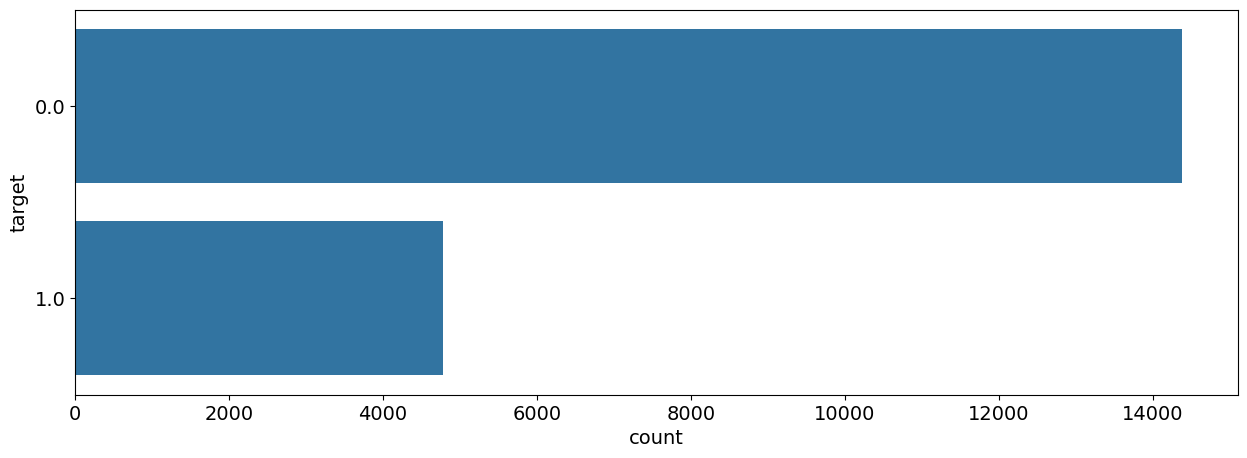

In [ ]:
#Checking if the data is Imbalanced or not and if it requires sampling,

plt.figure(figsize=(15,5))
plt.rc("font", size=14)
sns.countplot(y="target", data= employeeData)

# Data Pre-processing

In [ ]:
#changing float features to int
employeeData["target"] = employeeData["target"].astype('int64')
#encoding binary variables
employeeData["relevent_experience"] = employeeData["relevent_experience"].map({'Has relevent experience':1, 'No relevent experience':0})

In [ ]:
##encoding categorical features into numerical values
from sklearn.preprocessing import LabelEncoder

encoding_cols = ["education_level", "major_discipline", "experience", "company_size", "last_new_job", "company_type", "enrolled_university"]
label_encoders = {}
for column in encoding_cols:
  label_encoders[column] = LabelEncoder()
  employeeData[column] = label_encoders[column].fit_transform(employeeData[column])

In [ ]:
employeeData.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,1,2,0,5,21,8,6,0,36,1
1,29725,city_40,0.776,Male,0,2,0,5,6,4,5,4,47,0
2,11561,city_21,0.624,NaN,0,0,0,5,15,8,6,5,83,0
3,33241,city_115,0.789,NaN,0,3,0,1,20,8,5,5,52,1
4,666,city_162,0.767,Male,1,2,2,5,21,4,1,3,8,0


In [ ]:
employeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     19158 non-null  int64  
 6   education_level         19158 non-null  int64  
 7   major_discipline        19158 non-null  int64  
 8   experience              19158 non-null  int64  
 9   company_size            19158 non-null  int64  
 10  company_type            19158 non-null  int64  
 11  last_new_job            19158 non-null  int64  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(11), object(2)
me

In [ ]:
#Dropping irrelevant features which should not contribute to the target
employeeData.drop(['enrollee_id', 'city', 'gender'], axis=1, inplace=True)

# Resampling

---



In [ ]:
# Using undersampling because large amount of data
minority_class_len = len(employeeData[employeeData['target'] == 1])
print(minority_class_len)

4777


In [ ]:
X = employeeData.drop('target', axis=1)
y = employeeData['target']

##undersampling
minority_class_len = len(employeeData[employeeData['target'] == 1])
print(minority_class_len)

majority_class_indices = employeeData[employeeData['target'] == 0].index
print(majority_class_indices)


4777
Int64Index([    1,     2,     4,     6,     9,    11,    12,    13,    14,
               15,
            ...
            19142, 19143, 19145, 19146, 19150, 19151, 19152, 19155, 19156,
            19157],
           dtype='int64', length=14381)


In [ ]:
import numpy as np
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len,
                                           replace=False)
print(len(random_majority_indices))

4777


In [ ]:
minority_class_indices = employeeData[employeeData['target']== 1 ].index
print(minority_class_indices)

Int64Index([    0,     3,     5,     7,     8,    10,    18,    19,    26,
               28,
            ...
            19122, 19127, 19129, 19136, 19144, 19147, 19148, 19149, 19153,
            19154],
           dtype='int64', length=4777)


In [ ]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [ ]:
under_Sample = employeeData.loc[under_sample_indices]

<Axes: xlabel='target', ylabel='count'>

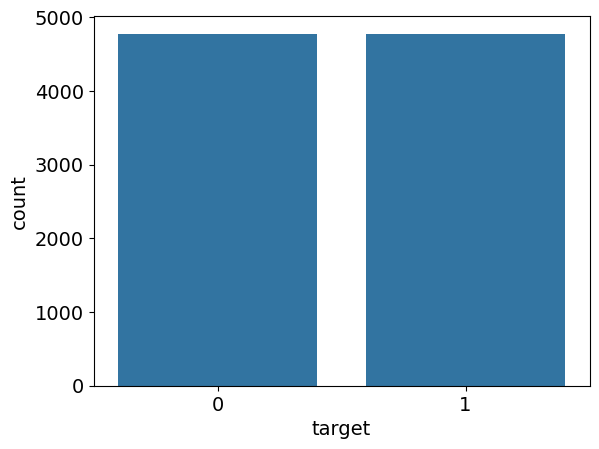

In [ ]:
sns.countplot(x='target', data= under_Sample) #Same sample size

# Training using Random forest classifier to check the most relevant features

In [ ]:
X = under_Sample.loc[:, employeeData.columns!='target']
Y = under_Sample.loc[:, employeeData.columns=='target']

In [ ]:
from sklearn.model_selection import train_test_split

assert len(X) == len(Y), "X and Y must have the same number of samples"

# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


<ipython-input-25-50950827294b>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Visualisation

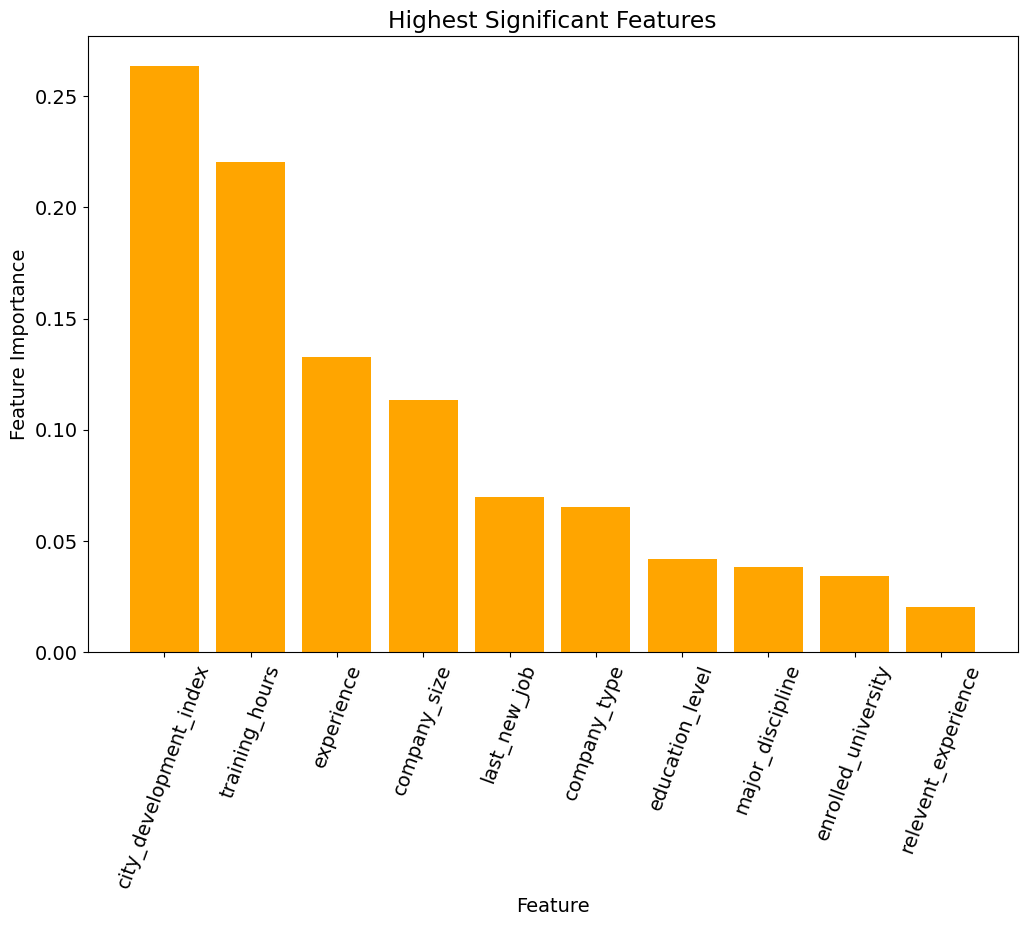

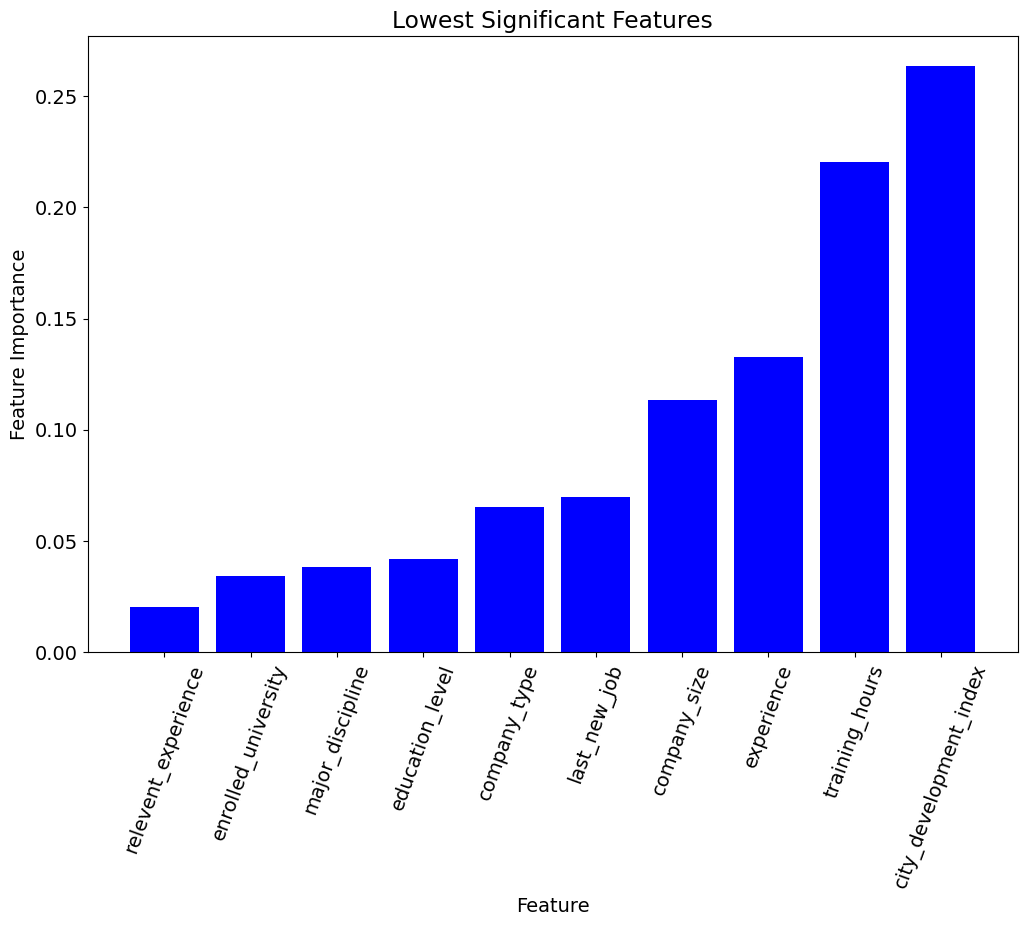

In [ ]:
import matplotlib.pyplot as plt

feature_significance = rf_model.feature_importances_

feature_names = X.columns

# Sorting the features according to significance
sorted_indices = feature_significance.argsort()[::-1]
sorted_feature_significance = feature_significance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Selecting the top ten features
top_feature_significance= sorted_feature_significance[:10]
top_feature_names = sorted_feature_names[:10]

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_feature_significance)), top_feature_significance, tick_label=top_feature_names, color='orange')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Highest Significant Features')
plt.xticks(rotation=70)
plt.show()



# Sorting the features according to significance (ascending order)
sorted_indices = feature_significance.argsort()
sorted_feature_significance = feature_significance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Selecting the lowest ten significant features
lowest_feature_significance = sorted_feature_significance[:10]
lowest_feature_names = sorted_feature_names[:10]

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(range(len(lowest_feature_significance)), lowest_feature_significance, tick_label=lowest_feature_names, color='blue')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Lowest Significant Features')
plt.xticks(rotation=70)
plt.show()




# Analysis and Interpretaion

After training the model in a RandomForestClassifier, we can come to the following conclusion


*  **City Development Index (CDI)**: The City Development was the topmost feature affecting the employee, implying employees living in such cities are more likely to stay which could be due reasons like better job opportunities, better quality of life etc.


*  **Training Hours**: Training Hours plays a crucial role in employee retention, this implies that employees receiving more hours of training will stay in the company. Suggesting, that employee development and continuous learning has a positive effect on employee retention and lesser churning.

*  **Relevant Experience and Enrollment in an Univeristy has the least amount of significane** so that can be not looked into while hiring to avoid churning


Therefore, the graph highlights several features that significantly influence employee retention and how the company can take steps to avoid employee churning. It’s essential to consider these factors when building a predictive model for churn

# Challenge 2

# Developing a model that predicts employee churn, complete with churn probabilities.

# Model Training using ANN

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)






Epoch 1/100
160/160 [==============================] - 3s 5ms/step - loss: 0.9697 - accuracy: 0.5021 - val_loss: 0.6683 - val_accuracy: 0.6097
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.8223 - accuracy: 0.5154 - val_loss: 0.6587 - val_accuracy: 0.6300
Epoch 3/100
160/160 [==============================] - 1s 3ms/step - loss: 0.7627 - accuracy: 0.5459 - val_loss: 0.6570 - val_accuracy: 0.6495
Epoch 4/100
160/160 [==============================] - 0s 3ms/step - loss: 0.7236 - accuracy: 0.5533 - val_loss: 0.6516 - val_accuracy: 0.6472
Epoch 5/100
160/160 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.5717 - val_loss: 0.6472 - val_accuracy: 0.6386
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5842 - val_loss: 0.6501 - val_accuracy: 0.6503
Epoch 7/100
160/160 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5891 - val_loss: 0.6487 - val_accuracy: 0.6495

# Visualisation

In [ ]:
# Churning Probabilities
churn_probabilities = model.predict(X_test)
churn_probabilities_positive_class = churn_probabilities[:, 0]


99/99 [==============================] - 0s 4ms/step


99/99 [==============================] - 0s 3ms/step
Accuracy: 0.7199492546780843
Precision: 0.6899679829242262
Recall: 0.8106583072100313
F1-score: 0.7454597866820409
ROC AUC Score: 0.7749495977883388


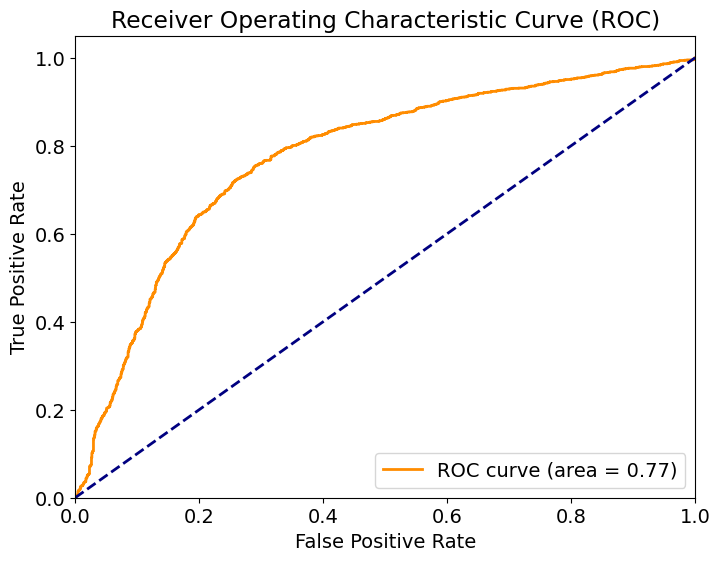

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting on the test set
y_pred = model.predict(X_test)

# Converting probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend(loc="lower right")
plt.show()




# Analysis

**The Receiver Operating Characteristic (ROC) curve** is a tool used for evaluating the performance of an ANN model, in this case for predicting employee churn.

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds.

TPR represents the proportion of actual positive cases correctly predicted by the model.
FPR represents the proportion of actual negative cases incorrectly predicted as positive by the model.

# Interpretation:

The orange curve in your ROC plot indicates the performance of your ANN model.
If the curve is significantly above the diagonal line, it suggests that the ANN  model is performing well.
Specifically:
The higher the curve, the better the TPR (true positive rate), indicating that your model correctly identifies churn cases.

The lower the FPR (false positive rate), the better, as it means fewer non-churn cases are incorrectly classified as churn.

Threshold Selection:

The ROC curve helps one to choose an appropriate classification threshold.
The point closest to the top-left corner (where TPR is high and FPR is low) is often considered optimal.

**Model Assessment**:

Since our model's ROC curve is quite above the diagonal, it suggests that your ANN model has good discriminatory power for employee churn



# Comparing with Decision Tree and Logistic Models

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Report:
Accuracy: 0.6457342213764669
Precision: 0.6431137724550898
Recall: 0.6733542319749216
F1-score: 0.6578866768759571
ROC AUC Score: 0.6457772805743236

Logistic Regression Report :
Accuracy: 0.6784015223596574
Precision: 0.6807716241443684
Recall: 0.6858934169278997
F1-score: 0.6833229231730169
ROC AUC Score: 0.719632315362916


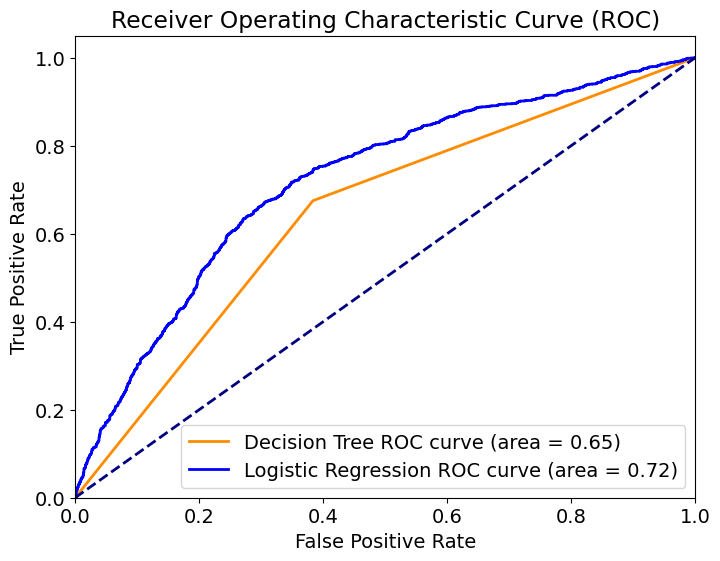

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred_dt = decision_tree_model.predict(X_test)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

# Evaluation Metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Evaluation Metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])


print("Decision Tree Report:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("ROC AUC Score:", roc_auc_dt)

print("\nLogistic Regression Report :")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print("ROC AUC Score:", roc_auc_lr)

# Plotting the ROC Curve for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_dt)

# Plotting the ROC Curve for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_lr)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend(loc="lower right")
plt.show()


# Why ANN is a better model than Decision Tree Classifier or Logistic regression for Employee Churn

**Higher Score**:
The ANN model has an better score of 77, which indicates the model's ability to make accurate predictions.
In contrast, the Decision Tree model has an ROC AUC Score of 0.65, and the Logistic Regression model has an ROC AUC Score of 0.72.
Higher scores are generally desirable because they reflect better model performance.

**Complexity and Non-Linearity:**
Decision Trees are prone to overfitting, especially when the tree becomes too deep. They tend to capture noise in the data and create overly complex models.
On the other hand logistic regression assumes a linear relationship between features and the target variable. If the underlying relationship is non-linear, it may not perform as well.


To summarise, the ANN model’s higher score, its ability to handle complexity, feature representation, generalization, and effective hyperparameter tuning contribute to its superiority over the Decision Tree and Logistic Regression models for Employee Churn. Hence, Pear Inc can go forward with the ANN model easily.